<a href="https://colab.research.google.com/github/satanimeet/SpamDetection/blob/main/coretextprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk spacy matplotlib
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 48.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Plotting top 10 NLTK Tokens...


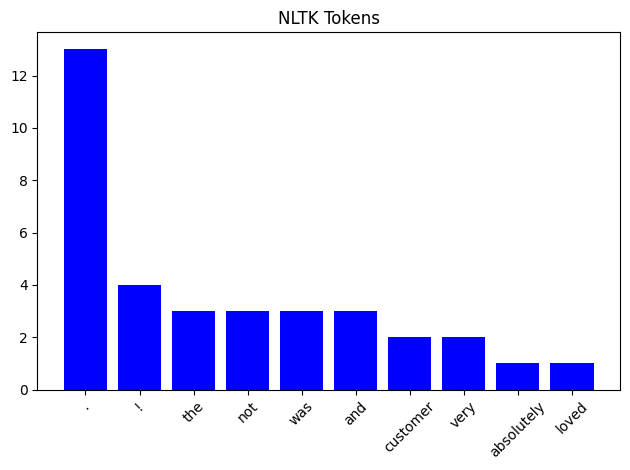

Plotting top 10 NLTK Stems...


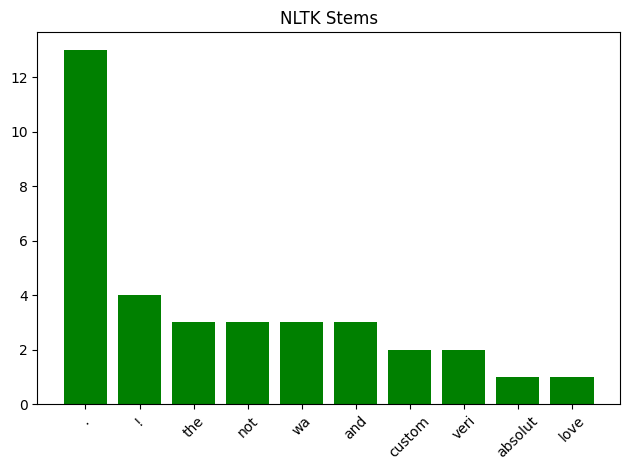

Plotting top 10 NLTK Lemmas...


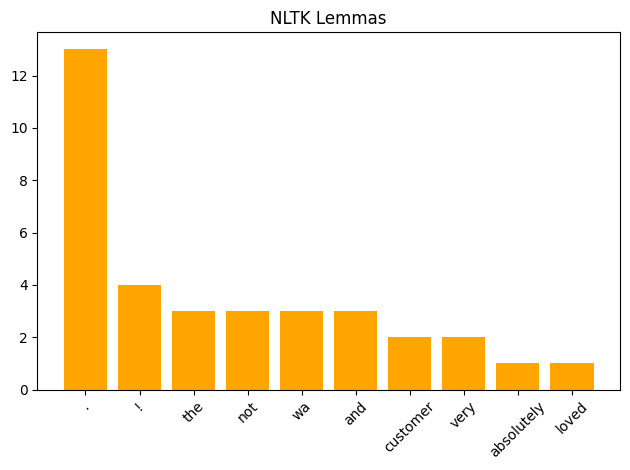

Plotting top 10 spaCy Tokens...


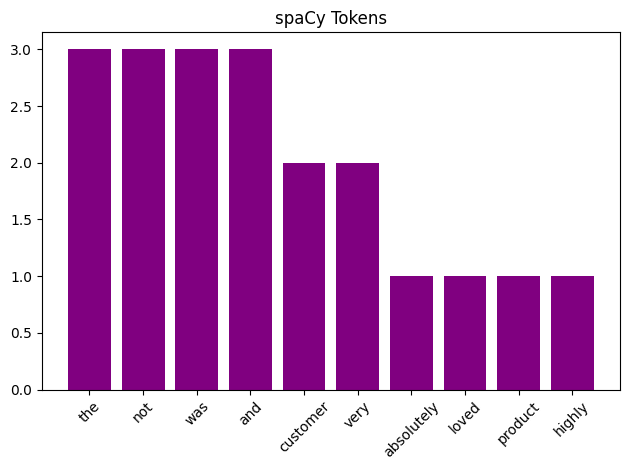

Plotting top 10 spaCy Lemmas...


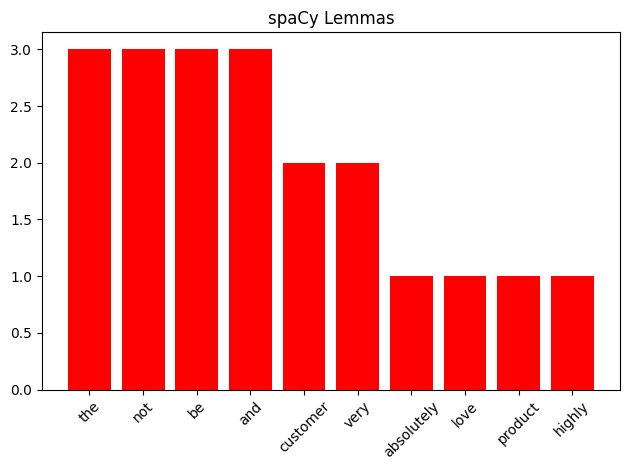

In [ ]:
import pandas as pd
import nltk
import spacy
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from collections import Counter


nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')


data = {
    "Text": [
        "Absolutely loved the product! Highly recommend it.",
        "Worst experience ever. Will not buy again!",
        "Service was okay, but delivery took too long.",
        "Great quality and fast shipping. Happy customer!",
        "Terrible packaging. The item was damaged.",
        "Amazing! Exceeded my expectations.",
        "Do not waste your money on this.",
        "Perfect size and design. Just what I needed.",
        "Customer support was very helpful and polite.",
        "Not worth the price. Very disappointed."
    ]
}

df = pd.DataFrame(data)
texts = df["Text"].tolist()


stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
nlp = spacy.load("en_core_web_sm")


nltk_tokens = []
nltk_stems = []
nltk_lemmas = []

for text in texts:
    tokens = word_tokenize(text.lower())
    nltk_tokens.extend(tokens)
    nltk_stems.extend([stemmer.stem(t) for t in tokens])
    nltk_lemmas.extend([lemmatizer.lemmatize(t) for t in tokens])


spacy_tokens = []
spacy_lemmas = []

for doc in nlp.pipe(texts):
    tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_space]
    lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space]
    spacy_tokens.extend(tokens)
    spacy_lemmas.extend(lemmas)


def plot_counter(counter, title, color):
    common = counter.most_common(10)
    words, counts = zip(*common)
    plt.bar(words, counts, color=color)
    plt.xticks(rotation=45)
    plt.title(title)
    plt.tight_layout()
    plt.show()


print("Plotting top 10 NLTK Tokens...")
plot_counter(Counter(nltk_tokens), "NLTK Tokens", "blue")

print("Plotting top 10 NLTK Stems...")
plot_counter(Counter(nltk_stems), "NLTK Stems", "green")

print("Plotting top 10 NLTK Lemmas...")
plot_counter(Counter(nltk_lemmas), "NLTK Lemmas", "orange")

print("Plotting top 10 spaCy Tokens...")
plot_counter(Counter(spacy_tokens), "spaCy Tokens", "purple")

print("Plotting top 10 spaCy Lemmas...")
plot_counter(Counter(spacy_lemmas), "spaCy Lemmas", "red")
